## Understand the Data

I will work with the FyntraCustomerData.csv. It has Customer info, such as Email, Address. Then it also has numerical value columns:

* Avg_Session_Length: Average session of in-store style advice sessions.
* Time_on_App: Average time spent on App in minutes
* Time_on_Website: Average time spent on Website in minutes
* Length_of_Membership: How many years the customer has been a member. 
* Yearly_Amount_Spent: The output parameter -- Amount Spend in thousand $ in a year 


** Reading the FyntraCustomerData.csv file as a DataFrame called customers.**

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
customers = pd.read_csv("FyntraCustomerData.csv")

**Using the head(), info() and describe() methods on customers dataframe to get some insights into data

In [3]:
customers.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg_Session_Length      500 non-null float64
Time_on_App             500 non-null float64
Time_on_Website         500 non-null float64
Length_of_Membership    500 non-null float64
Yearly_Amount_Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


** There is no missing data on the dataset so I started working on Exploratory Data Analysis **

## Exploratory Data Analysis

**Used seaborn to create a jointplot for comparing the Time on Website and Yearly Amount Spent columns. **

In [10]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

/Users/krushabgandhi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


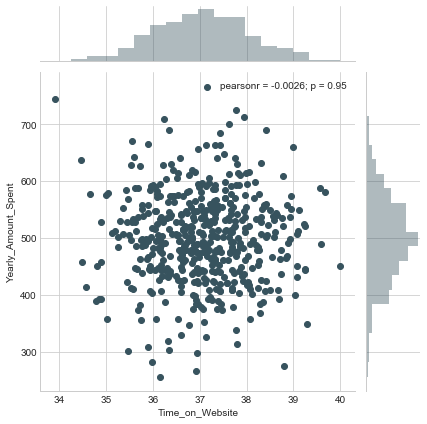

In [12]:
# More time on site, more money spent.
sns.jointplot(x='Time_on_Website',y='Yearly_Amount_Spent',data=customers)

/Users/krushabgandhi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


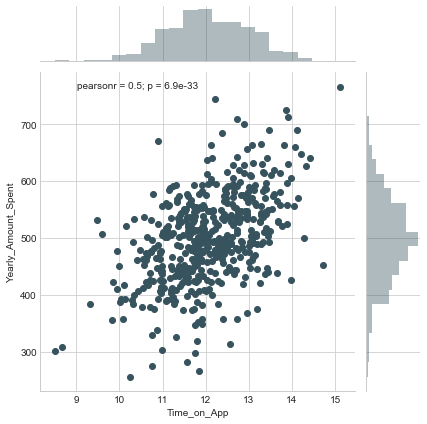

In [13]:
sns.jointplot(x='Time_on_App',y='Yearly_Amount_Spent',data=customers)
# This one looks stronger correlation than Time_on_Website

** I tried to create pair plots to visualize how different variables of the dataset relate to each other **

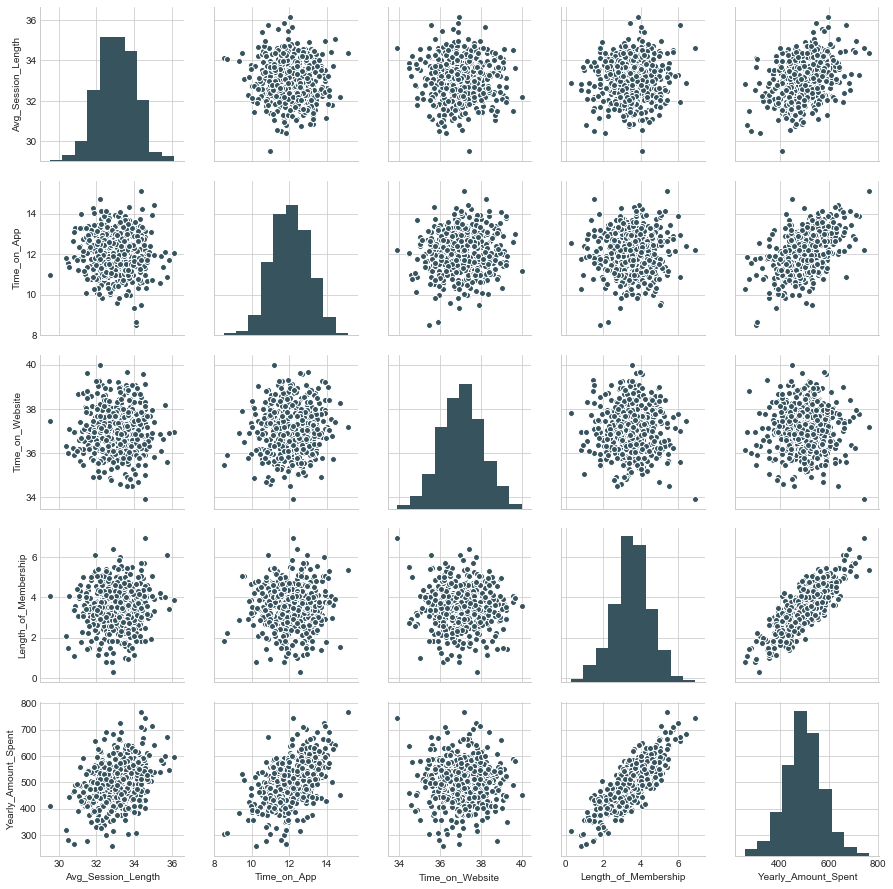

In [15]:
sns.pairplot(customers)

As seen from the above plots the most correlated feature with Yearly Amount Spent is the **Length of Membership**

**Created a linear model plot (using seaborn's lmplot) for Yearly Amount Spent vs. Length of Membership to visualize the relationship. **

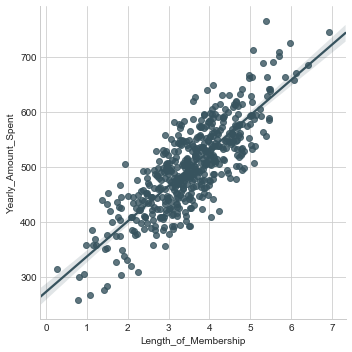

In [16]:
sns.lmplot(x='Length_of_Membership',y='Yearly_Amount_Spent',data=customers)

## Training and Testing Data

Splitting the data into training and testing sets.
** Setting a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly_Amount_Spent" column. **

In [19]:
y = customers['Yearly_Amount_Spent']

In [20]:
X = customers[['Avg_Session_Length', 'Time_on_App','Time_on_Website', 'Length_of_Membership']]

** Used model_selection.train_test_split from sklearn to split the data into training and testing sets. Using test_size=0.3 and random_state=85. test_size=0.3**

In [17]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

## Training the Model

** Import LinearRegression from sklearn.linear_model **

In [22]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [23]:
lm = LinearRegression()

** Fitting lm on the training data.**

In [24]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model and they will be in order of dimensions in X**

**X = customers[['Avg_Session_Length', 'Time_on_App','Time_on_Website', 'Length_of_Membership']]**

In [25]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [26.08163249 39.18778762  0.40460005 61.41777824]


## Predicting Test Data

** Using lm.predict() to predict off the X_test set of the data.**

In [26]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values.**

Text(0,0.5,'Predicted Y')

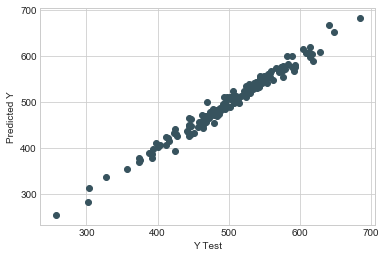

In [32]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Evaluating the model performance by calculating the residual sum of squares

In [35]:
from sklearn import metrics

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

RMSE: 10.57


## Residuals

Plotted the residuals to understand its distribution.

/Users/krushabgandhi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


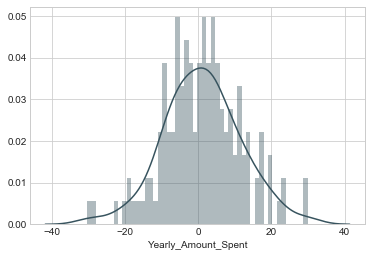

In [36]:
sns.distplot((y_test-predictions),bins=50);

In [37]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg_Session_Length,26.081632
Time_on_App,39.187788
Time_on_Website,0.404600
Length_of_Membership,61.417778


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 26.08 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 39.18 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.40 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.41 total dollars spent**.


**Clearly Time On App leads to higher revenue conversion – hence company should focus on App rather than website.  Whether company should shutdown the website depends solely on management take on revenue through website **


## Thank You!